# Teste de Performance 2

Engenharia de Prompts para Ciência de Dados

Pedro Monteiro Vieira Bayma Azevedo

## Imports

In [27]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import yaml
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
load_dotenv('.env')

True

## Exercício 1

No prompt fornecido podemos identificar os seguintes princípios:

1. Contexto e Persona: O contexto e a persona, "um especialista em turismo", fornecem informações que auxiliam o modelo a situar a resposta dentro de um cenário ou perspectiva específica. O contexto define o ambiente ou a situação, enquanto a persona pode ajustar o tom ou estilo da resposta com base em quem está respondendo.

2. Tarefa Simples e Específica e Direcionamento: O prompt especifica claramente a tarefa a ser realizada, especificando com detalhes o que se espera da resposta do modelo: listar 3 atrações turísticas imperdíveis de Paris e fornecer uma breve descrição para cada uma.

3. Formatação: é especificado um formato de saída do dado: "listar" e "fornecer uma breve descrição para cada uma".

4. Exemplificação: foram fornecidos exemplos, também conhecido como few-shot prompting, para permitir que o modelo compeenda melhor o que é esperado dele: 

        "Aqui está um exemplo do formato esperado:
        Atração 1: Torre Eiffel
        Descrição: Um dos monumentos mais icônicos do mundo, conhecido por sua estrutura de ferro e vista panorâmica da cidade."


## Exercício 2

### Cliente Tranquilo

![Cliente Tranquilo](./images/2-poe-calm-client.png)

### Cliente Agressivo

![Cliente Agressivo](./images/2-poe-agressive-client.png)

### Resposta

O comportamento dos clientes nas diferentes situações saiu como esperado. O cliente mais tranquilo foi receptivo ao contato e mesmo não tendo fechado a proposta no momento, mostrou-se aberto à migração. Por sua vez, o cliente mais agressivo não foi receptivo ao contato, buscando o confilito ao invés de focar na proposta.

## Exercício 3

### Mensagem

![Mensagem Viagem](./images/3-mensagem-viagens.png)

### Resposta

O LLM respondeu sim como o esperado, inclusive retornando uma resposta muito bem feita e adequada ao caso, trazendo todos os itens solicitados no prompt, como por exemplo, o desconto oferecido e a data de validade da promoção, além de ter incorporado adequadamente a persona e o tom desejado.



## Exercício 4

### Prompt Sem Few-Shot

![No Few](./images/4-no-few-shot.png)

### Prompt Com Few-Shot

![No Few](./images/4-few-shot.png)

### Resposta

Contrariando o esperado, o prompt com sem o few shot foi o mais eficaz uma vez que aparentemente o LLM não compreendeu que os few-shots tratavam-se de exemplos e que eu gostaria que ele tivesse gerado novos e não apenas reproduzido o que eu informei inicialmente.

## Exercício 5

### Prompt Criado

![Prompt Criado](./images/5%20-criar-prompt.png)

### Prompt Retornado

![Prompt Retornado](./images/5-lista-equipamentos.png)

### Resposta

O resultado atendeu parcialmente as expectativas, uma vez que não incluiu um monitor e nem periféricos. Ainda os preços retornados estão em dólares e não em reais, o ideal seria que o LLM identificasse o idioma portugues e trouxesse os resultados na moeda local. Outro ponto de inconsistência foi o valor dos equipamentos que está diferente do comercializado para alguns produtos, como por exemplo os processadores, mesmo quando comparado com valores em dolar em conversão direta ou acessando lojas nos Estados Unidos, todavia os equipamentos existem. Por fim, os equipamentos relacionaos parecem adequados a um computador de alto desempenho, nos levando a concluir que o problema ocorreu não no prompt criado inicialmente, mas na execução do mesmo pelo LLM posteriormente.



## Exercício 6

### Prompt Simples

![Prompt Simples](./images/6-prompt-simples.png)

### Prompt com Princípios

![Prompt Princípios](./images/6-prompt-principios.png)

### Resposta

Entre um prompt e outro houve diferença entre as vantagens apresentadas pelo LLM nos 2 casos, com alguns pontos aparecendo em somente um deles.

Outro ponto de observação foi que o resultado do prompt após a aplicação dos princípios foi mais preciso e claro na apresentação dos pontos, produzindo um conteúdo de melhor qualidade e mais específico, com mais detalhamento e precisão.

## Exercício 7

### Código

In [3]:
noticia = '''Segundo o departamento de combate a fraudes do Nubank, criminosos levam, em média, 
sete minutos para transferir para a conta de um laranja laranja e sacar o dinheiro obtido em golpes. 
Além disso, 70% dos clientes do banco caem em ações do tipo, apesar de alertas.
As informações são de Fabiola Marchiori, vice-presidente de engenharia e gerente geral de combate 
a fraudes da instituição. 
Ela participou de um evento do Mobile Time sobre finanças. Marchiori ainda explicou que o Nubank 
tem mecanismos para atrasar transferências suspeitas, com suspensões que podem durar três horas 
ou até o dia seguinte.
A executiva apontou a engenharia social como um fator determinante. Engenharia social é o nome 
dado a técnicas de manipulação para conseguir convencer as vítimas a colaborar com os golpistas. 
A vice-presidente considera que os golpes se tornaram uma questão de segurança pública geral e 
que este tipo de crime atinge qualquer classe social e idade.
Os dados reunidos pelo Nubank corroboram o que outras instituições já observaram. Segundo a 
Federação Brasileira de Bancos (Febraban), os golpistas “espalham” o dinheiro das vítimas em 
muitas contas, de forma muito rápida.
Por isso, a Febraban quer que o Mecanismo Especial de Devolução (MED) do Pix seja mais abrangente, 
com a possibilidade de bloquear os recursos financeiros em mais camadas. Assim, mesmo que o criminoso 
transfira o dinheiro para outra conta, esta quantia ainda poderia ser bloqueada.
Estas alterações, porém, não resolveriam o problema dos saques. Uma vez que a quantia é retirada 
em espécie, não haveria como reverter a transferência.
Além disso, os criminosos conseguem ser criativos a ponto de usar os próprios regulamentos de 
proteção para aplicar golpes. Recentemente, surgiu o golpe do Pix errado.
Funciona assim: o criminoso faz um Pix para a vítima, entra em contato dizendo ser engano e 
pedindo a devolução do valor. Após receber o dinheiro de volta, ele faz uma reclamação formal 
ao banco, que usa o MED para retirar novamente o dinheiro da vítima e transferi-lo para o bandido.
'''

In [4]:
api_key = os.getenv('GEMINI_KEY')
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-1.5-flash")

prompt = f'''resuma a <NOTICIA> em apenas uma sentença curta com os principais pontos da notícia.
Aqui está um exemplo de resumo:
<NOTICIA>
"A empresa X lançou um novo smartphone no mercado."
###
<RESUMO>
"A empresa X anunciou o lançamento de um novo smartphone, trazendo inovações tecnológicas e maior duração de bateria."

Agora, faça o resumo da noticia abaixo:
<NOTICIA>
"{noticia}"
###
<RESUMO>
'''

response = model.generate_content(prompt)
print(response.text)

O Nubank revelou que criminosos levam em média sete minutos para transferir dinheiro de golpes para contas de "laranjas" e sacar, e 70% dos clientes do banco são vítimas, apesar de alertas, com a engenharia social sendo um fator chave. 



### Avaliação

A formatação da saída não retornou como a desejada mas o objetivo de resumir a notícia em apenas uma sentença foi atingido, assim entendemos a expectativa como partialmente atendida.

## Exercício 8

### Código

In [5]:
noticia1 = """
A polícia do Capitólio, sede do Legislativo dos EUA, prendeu um homem que cheirava a combustível e 
portava uma tocha e um isqueiro na entrada do centro de visitação nesta terça (5), dia da eleição presidencial americana.
Os agentes informaram que o homem foi detido durante o processo de verificação de segurança e que 
as visitas foram suspensas por todo o dia para investigação adicional do episódio.
"""

noticia2 = """O governo Luiz Inácio Lula da Silva decidiu interromper, por tempo indeterminado, 
o envio de aviões da Força Aérea Brasileira (FAB) ao Líbano para repatriar brasileiros que desejam 
fugir do confronto entre Israel e o grupo extremista Hezbollah.
Até esta quarta (5), dez voos fizeram o trajeto de ida e volta entre a capital do Líbano, Beirute, 
e o território brasileiro. Ao todo, 2.071 passageiros foram transportados, entre brasileiros e parentes de primeiro grau.
No início da operação, o Ministério das Relações Exteriores informou que 3 mil brasileiros tinham 
demonstrado interesse em voltar ao país.
Três brasileiros, todos menores de idade, morreram desde a escalada do conflito em outubro – 
incluindo uma bebê de 1 ano.
Em mensagem divulgada por canal oficial, a Embaixada do Brasil no Líbano informou à 
comunidade local que não há data para a próxima viagem em voo da FAB.
"A realização de novo voo de repatriação dependerá da demanda por parte de pessoas 
que se enquadrem nas prioridades definidas em lei, como também das condições de segurança", diz o Itamaraty.
Na mesma mensagem, o governo informa que fez acordo com a Middle East Airlines 
para que brasileiros tenham prioridade de embarque para Madri (Espanha) e Frankfurt (Alemanha).
"Reserva e compra de bilhete cabem, naturalmente, aos interessados", diz a 
Embaixada – deixando claro que o governo não vai mediar e nem custear essas passagens.
"A Embaixada do Brasil reitera a recomendação de que os nacionais residentes ou 
de passagem pelo Líbano deixem o país por meios próprios", diz outra mensagem enviada aos brasileiros.
Israel intensifica bombardeios no Líbano e na Faixa de Gaza
Veja abaixo quantas pessoas foram repatriadas em cada voo da FAB:
Primeiro voo: 229 pessoas;
Segundo voo: 227 pessoas;
Terceiro voo: 217 pessoas;
Quarto voo: 211 pessoas;
Quinto voo: 220 pessoas;
Sexto voo: 212 pessoas;
Sétimo voo: 82 pessoas;
Oitavo voo: 239 pessoas.
Nono voo: 221 pessoas
Décimo: 213 pessoas
Total: 2.071 passageiros"""

noticia3 = """
O ministro da Defesa de Israel, Yoav Gallant, fala com o primeiro-ministro 
Benjamin Netanyahu, durante sessão do Parlamento em 24 de julho de 2023.
O primeiro-ministro de Israel, Benjamin Netanyahu, demitiu o ministro da 
Defesa, Yoav Gallant, nesta terça-feira (5).
Netanyahu afirmou que "houve muitas lacunas entre ele e Gallant sobre a 
gestão das guerras de Israel".
O primeiro-ministro ainda disse que uma crise de confiança se 
desenvolveu entre ele e o até então ministro da Defesa, o que não permitiu a "gestão normal da guerra".
Gallant se manifestou nas redes sociais após a demissão.
"A segurança do Estado de Israel foi e sempre será a missão da 
minha vida", afirmou em publicação no X.
Israel Katz, atual chanceler do país, foi nomeado para substituir 
Gallant no cargo. Gideon Saar deve assumir como ministro das Relações Exteriores.
Netanyahu e Gallant têm se desentendido repetidamente sobre a 
guerra em Gaza. Mas Netanyahu evitou demitir seu rival.
Nos primeiros dias da guerra, a liderança de Israel apresentou 
uma frente unificada ao responder ao ataque do Hamas em 7 de outubro 
de 2023. Mas, à medida que a guerra se arrastava e se espalhava para o 
Líbano, diferenças políticas importantes surgiram.
Enquanto Netanyahu pediu pressão militar contínua sobre o Hamas, 
Gallant adotou uma abordagem mais pragmática, dizendo que a força militar criou as condições necessárias para um acordo diplomático que poderia trazer para casa os reféns mantidos pelo grupo militante.
Uma tentativa anterior de Netanyahu de demitir Gallant em março 
de 2023 desencadeou protestos generalizados nas ruas contra Netanyahu. 
Ele também flertou com a ideia de demitir Gallant durante o verão, mas adiou até o anúncio de terça-feira.
Em 7 de outubro de 2023, terroristas do Hamas atacaram a região sul de 
Israel e mataram 1,2 mil pessoas. Outras cerca de 250 foram feitas reféns, de acordo com contagens israelenses. Mais de 100 reféns continuam sendo mantidos em cárcere pelo Hamas.
Segundo um balanço divulgado no início de outubro pelas Forças Armadas de 
Israel mostra que 782 soldados morreram em combate na guerra na Faixa de Gaza e nos ataques do grupo terrorista Hamas, ocorridos há um ano.
No território palestino, quase 42 mil pessoas foram mortas pelas forças 
de Israel, segundo o Ministério da Saúde.
Ataques israelenses matam mais de 30 na Faixa de Gaza
"""


In [6]:
def identificar_entidades(noticia, api_key):
    prompt = f"""
    Como um especialista em jornalismo e geopolítica, 
    identifique e liste as entidades mencionadas na seguinte notícia. 
    As entidades podem incluir pessoas, órgãos públicos, empresas, dentre outras.
    Aqui está a notícia:

    {noticia}

    Favor retornar o resultado formatado como no exemplo abaixo:

    Entidades identificadas:
    
    Pessoas: Pessoa1, Pessoa2 - Órgãos Públicos: Orgão1, Orgão2 - Empresas: Empresa1, Empresa2 - Outros: Outro1, Outro2
    
    """
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    
    return response.text

In [7]:
identificar_entidades(noticia1, api_key)

'Entidades identificadas:\n\n* **Pessoas:** Homem (não identificado)\n* **Órgãos Públicos:** Polícia do Capitólio (EUA), Legislativo dos EUA\n* **Empresas:** Nenhuma\n* **Outros:** Centro de visitação (Capitólio), Tocha, Isqueiro, Eleição presidencial americana \n'

In [8]:
identificar_entidades(noticia2, api_key)

'## Entidades identificadas:\n\n**Pessoas:** Luiz Inácio Lula da Silva \n\n**Órgãos Públicos:** \n\n* Governo do Brasil\n* Ministério das Relações Exteriores (Itamaraty)\n* Força Aérea Brasileira (FAB)\n* Embaixada do Brasil no Líbano\n\n**Empresas:** \n\n* Middle East Airlines\n\n**Outros:**\n\n* Hezbollah\n* Israel\n* Líbano\n* Faixa de Gaza\n* Beirute\n* Madri (Espanha)\n* Frankfurt (Alemanha) \n'

In [9]:
identificar_entidades(noticia3, api_key)

'Entidades identificadas:\n\n**Pessoas:** Yoav Gallant, Benjamin Netanyahu, Israel Katz, Gideon Saar \n\n**Órgãos Públicos:** Ministério da Defesa de Israel, Parlamento de Israel, Forças Armadas de Israel, Ministério da Saúde de Israel\n\n**Empresas:**  X (plataforma de mídia social) \n\n**Outros:** Hamas, Estado de Israel, Faixa de Gaza, Líbano, guerra em Gaza,  ataque do Hamas, reféns,  protestos,  sessão do Parlamento \n'

### Resposta

A resposta do modelo atendeu as espectativas da consultoria uma vez que como pode ser visto acima, identificou corretamente, para cada categoria, as entidades das notícias.


## Exercício 9

Tokens podem ser considerados em diferentes tamanhos, variando desde caracteres até palavra ou frases por inteiro. De acordo com a [documentação](https://ai.google.dev/gemini-api/docs/tokens?lang=python) da API do Gemini, um token é equivalente a aproximadamente 4 caracteres, fazendo com que 100 tokens sejam aproximadamente 60 a 80 palavras no idioma inglês. Assim, é esperado que um texto de 5000 palavras utilize por volta de 7150 tokens.

Essa dinâmica é importante de ser compreendida uma vez que os limites de uso e os custos de se utilizar o serviço do Google de LLMs Gemini são calculados em quantidade de tokens como pode ser observado na imagem abaixo:

![Gemini Costs](./images/9-gemini-costs.png)

Outro ponto importante de se compreender essa dinâmica é com relação a janela de contexto que é medida também pelo número de tokens, e que determina o número máximo de tokens que modelo pode processar em uma única interação, considerando tanto o prompt de entrada quanto de saída. Essa janela varia de modelo para modelo. Quanto maior o prompt, ou seja, mais próximo do limite da janela, maior a latência no processamento, bem como a possibilidade do modelo não compreender o que está sendo solicitado.

A API do Google Gemini permite que você conte os tokens antes de enviar o prompt para processamento de forma a estimar os custos. Abaixo segue exemplo do procedimento que envolveu a contagem de um texto com 250 palavras de forma a estimar o número de caracteres de um texto com 5000 palavras. Conforme pode ser verificado, a estimativa obtida foi muito próxima daquela feita acima com apoio da documentação da API. Para o texto de 250 palavras obtivemos 364 tokens, assim par aum texto de 5000 palavras a estimativa seria 7280 tokens.


In [10]:
text_with_250 = """
Artificial intelligence (AI) has revolutionized various industries, offering unprecedented 
opportunities for innovation and efficiency. One of the most significant impacts of AI is in 
the field of healthcare. AI-powered systems can analyze vast amounts of medical data to 
identify patterns and predict outcomes, enabling early diagnosis and personalized treatment 
plans. This not only improves patient outcomes but also reduces the burden on healthcare professionals.
In the realm of finance, AI algorithms are transforming how we manage and invest money. Automated 
trading systems can process market data at lightning speed, making split-second decisions that 
maximize returns. Additionally, AI-driven risk assessment tools help financial institutions identify 
potential threats and mitigate them before they escalate.
The retail industry is also benefiting from AI advancements. Personalized shopping experiences, 
powered by AI, enhance customer satisfaction and loyalty. By analyzing customer behavior and preferences, 
AI systems can recommend products that are more likely to be purchased, increasing sales and revenue for businesses.
Moreover, AI is playing a crucial role in environmental conservation. Machine learning models can predict 
natural disasters, monitor wildlife populations, and optimize resource management. These applications are 
essential for addressing climate change and preserving biodiversity.
Despite these advancements, the integration of AI into various sectors raises ethical and societal concerns. 
Issues such as data privacy, algorithmic bias, and job displacement need to be addressed to ensure that 
AI benefits all of society. As we continue to develop and deploy AI technologies, it is crucial to 
establish frameworks that promote transparency, accountability, and fairness.
In conclusion, AI is a powerful tool that has the potential to transform industries and improve lives. However, 
it is essential to navigate its challenges responsibly to harness its full potential.
"""

In [11]:
model = genai.GenerativeModel("models/gemini-1.5-flash")
prompt = text_with_250

# Call `count_tokens` to get the input token count (`total_tokens`).
print(model.count_tokens(prompt))

total_tokens: 364



## Exercício 10

### Sem Role Prompting

![Sem Role](./images/10-sem-role.png)

### Com Role Prompting

![Com Role](./images/10-com-role.png)

### Resposta

As duas respostas do modelo foram bem similares, com a segunda que utilizou o role prompt sendo um pouco mais específica como se realmente fosse alguém especializado. Todavia, não identifiquei uso de linguagem mais jurídica, tampouco citação de leis e normas sobre o tema. Em que pese o prompt de retorno ser adequado, há espaço para melhoria de forma a deixar a resposta de saída mais próxima do role que se espera, como por exemplo com a solicitação do uso de linguagem jurídica e de referenciamento em normas do arcabouço jurídico.

## Exercício 11

In [12]:
with open('turism.yaml', 'r') as file:
    turism = yaml.safe_load(file)

turism

{'roteiro': {'atenas': 'Como um especialista em turismo,  liste 3 pontos turísticos imperdíveis  de Atenas, o número anual de visitantes, retornando apenas o número e  forneça uma breve descrição para cada um.\n',
  'roma': 'Como um especialista em turismo,  liste 3 pontos turísticos  imperdíveis de Roma,  o número anual de visitantes, retornando apenas o número, e  forneça uma breve descrição para cada um.'}}

### Atenas

In [13]:
api_key = os.getenv('GEMINI_KEY')
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-1.5-flash")

prompt = turism['roteiro']['atenas']

response = model.generate_content(prompt)
print(response.text)

## Atenas: 3 Pontos Turísticos Imperdíveis 

**1. Acrópole de Atenas:** 
* **Número de visitantes:**  **7,5 milhões**
* **Descrição:** Um dos monumentos mais icônicos da Grécia Antiga,  a Acrópole é um complexo de templos e edifícios antigos,  construídos em uma colina rochosa, com vistas panorâmicas da cidade. O ponto principal é o Partenon, um templo dedicado à deusa Atena,  que é considerado uma das maiores obras-primas da arquitetura clássica.

**2. Ágora Antiga:**
* **Número de visitantes:** **1 milhão**
* **Descrição:**  Um antigo mercado e centro da vida política e social em Atenas, a Ágora Antiga abriga ruínas de edifícios públicos, templos e casas, oferecendo uma visão fascinante da vida na Atenas Antiga.  

**3. Museu da Acrópole:**
* **Número de visitantes:** **1,5 milhões**
* **Descrição:**  Um museu moderno que abriga artefatos e esculturas da Acrópole,  incluindo as famosas cariátides. As exibições contam a história da construção e desenvolvimento do monumento, além de mo

### Roma

In [14]:
api_key = os.getenv('GEMINI_KEY')
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-1.5-flash")

prompt = turism['roteiro']['roma']

response = model.generate_content(prompt)
print(response.text)

## Roma: Três Pontos Turísticos Imperdíveis

**1. Coliseu:** 

* **Número de visitantes:** 7,4 milhões (2019)
* **Descrição:** Um anfiteatro romano construído no século I d.C., que sediou combates de gladiadores, caça de animais e outros espetáculos grandiosos. É um dos monumentos mais icônicos da cidade e um símbolo do poder do Império Romano.

**2. Fórum Romano e Palatino:**

* **Número de visitantes:** 3,5 milhões (2019)
* **Descrição:** O centro político e social de Roma durante a época do Império Romano, abrigando templos, basílicas e edifícios públicos. O Palatino, uma das sete colinas de Roma, abriga os restos de casas romanas luxuosas e palácios imperiais.

**3.  Museus do Vaticano:**

* **Número de visitantes:** 6,4 milhões (2019)
* **Descrição:** Um complexo de museus que abriga uma das maiores e mais importantes coleções de arte do mundo. A Capela Sistina, com seus afrescos de Michelangelo, é um destaque absoluto, além de outras obras-primas de artistas renomados. 



### Resposta

O prompt retornado foi de acordo com o solicitado, sendo os pontos turísticos apresentados relevantes, bem como as descrições e o formato solicitado

## Exercício 12

### Atenas

In [18]:
api_key = os.getenv('GEMINI_KEY')
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-1.5-flash")

prompt = turism['roteiro']['atenas']

response = model.generate_content(prompt + """O resultado final deve ser um objeto JSON sem nenhum 
                                  outro texto a não ser os dados solicitados no seguinte formato:
                                  {
"pontos_turisticos": [
{
"nome": "Acrópole",
"visitantes_anuais": 3000000,
"descricao": "Um antigo sítio arqueológico que abriga os monumentos icônicos da Grécia Antiga, incluindo o Parthenon."
},
{
"nome": "Fórum Romano",
"visitantes_anuais": 1000000,
"descricao": "Restos de um antigo fórum romano, com ruínas de templos, basílica e outras estruturas."
},
{
"nome": "Museu da Acrópole",
"visitantes_anuais": 1500000,
"descricao": "Um museu que exibe artefatos e esculturas encontradas na Acrópole, oferecendo insights sobre a história e a cultura da Grécia Antiga."
}
]
}
                                  """)
print(response.text)

{
"pontos_turisticos": [
{
"nome": "Acrópole",
"visitantes_anuais": 7000000,
"descricao": "Um antigo sítio arqueológico que abriga os monumentos icônicos da Grécia Antiga, incluindo o Parthenon."
},
{
"nome": "Museu da Acrópole",
"visitantes_anuais": 1400000,
"descricao": "Um museu que exibe artefatos e esculturas encontradas na Acrópole, oferecendo insights sobre a história e a cultura da Grécia Antiga."
},
{
"nome": "Agorá Antiga",
"visitantes_anuais": 500000,
"descricao": "O antigo mercado e centro cívico de Atenas, com ruínas de templos, edifícios públicos e casas."
}
]
} 



In [19]:
response_json = json.loads(response.text)
response_json

{'pontos_turisticos': [{'nome': 'Acrópole',
   'visitantes_anuais': 7000000,
   'descricao': 'Um antigo sítio arqueológico que abriga os monumentos icônicos da Grécia Antiga, incluindo o Parthenon.'},
  {'nome': 'Museu da Acrópole',
   'visitantes_anuais': 1400000,
   'descricao': 'Um museu que exibe artefatos e esculturas encontradas na Acrópole, oferecendo insights sobre a história e a cultura da Grécia Antiga.'},
  {'nome': 'Agorá Antiga',
   'visitantes_anuais': 500000,
   'descricao': 'O antigo mercado e centro cívico de Atenas, com ruínas de templos, edifícios públicos e casas.'}]}

In [21]:
df_atenas = pd.DataFrame(response_json["pontos_turisticos"])
df_atenas

,nome,visitantes_anuais,descricao
0,Acrópole,7000000,Um antigo sítio arqueológico que abriga os mon...
1,Museu da Acrópole,1400000,Um museu que exibe artefatos e esculturas enco...
2,Agorá Antiga,500000,"O antigo mercado e centro cívico de Atenas, co..."


### Roma

In [22]:
prompt = turism['roteiro']['roma']

response = model.generate_content(prompt + """O resultado final deve ser um objeto JSON sem nenhum 
                                  outro texto a não ser os dados solicitados no seguinte formato:
                                  {
"pontos_turisticos": [
{
"nome": "Acrópole",
"visitantes_anuais": 3000000,
"descricao": "Um antigo sítio arqueológico que abriga os monumentos icônicos da Grécia Antiga, incluindo o Parthenon."
},
{
"nome": "Fórum Romano",
"visitantes_anuais": 1000000,
"descricao": "Restos de um antigo fórum romano, com ruínas de templos, basílica e outras estruturas."
},
{
"nome": "Museu da Acrópole",
"visitantes_anuais": 1500000,
"descricao": "Um museu que exibe artefatos e esculturas encontradas na Acrópole, oferecendo insights sobre a história e a cultura da Grécia Antiga."
}
]
}
                                  """)
print(response.text)

{
"pontos_turisticos": [
{
"nome": "Coliseu",
"visitantes_anuais": 7400000,
"descricao": "Um anfiteatro romano antigo, conhecido por seus combates de gladiadores e outros espetáculos."
},
{
"nome": "Fórum Romano",
"visitantes_anuais": 2800000,
"descricao": "Restos de um antigo fórum romano, com ruínas de templos, basílica e outras estruturas."
},
{
"nome": "Museus do Vaticano",
"visitantes_anuais": 6400000,
"descricao": "Um complexo de museus que abriga uma vasta coleção de arte e artefatos, incluindo a Capela Sistina."
}
]
}


In [23]:
response_json = json.loads(response.text)
df_roma = pd.DataFrame(response_json["pontos_turisticos"])
df_roma

,nome,visitantes_anuais,descricao
0,Coliseu,7400000,"Um anfiteatro romano antigo, conhecido por seu..."
1,Fórum Romano,2800000,"Restos de um antigo fórum romano, com ruínas d..."
2,Museus do Vaticano,6400000,Um complexo de museus que abriga uma vasta col...


### Plot

In [43]:
df_final  = pd.concat([df_atenas, df_roma])
df_final['visitantes_anuais'] = df_final['visitantes_anuais']/1E6
df_final

,nome,visitantes_anuais,descricao
0,Acrópole,7.0,Um antigo sítio arqueológico que abriga os mon...
1,Museu da Acrópole,1.4,Um museu que exibe artefatos e esculturas enco...
2,Agorá Antiga,0.5,"O antigo mercado e centro cívico de Atenas, co..."
0,Coliseu,7.4,"Um anfiteatro romano antigo, conhecido por seu..."
1,Fórum Romano,2.8,"Restos de um antigo fórum romano, com ruínas d..."
2,Museus do Vaticano,6.4,Um complexo de museus que abriga uma vasta col...


/var/folders/s3/551538vd1w73xsy14_50l2w80000gn/T/ipykernel_76266/1924913053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='visitantes_anuais', y='nome', data=df_final.sort_values('visitantes_anuais'), palette='viridis')
/var/folders/s3/551538vd1w73xsy14_50l2w80000gn/T/ipykernel_76266/1924913053.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Legenda')


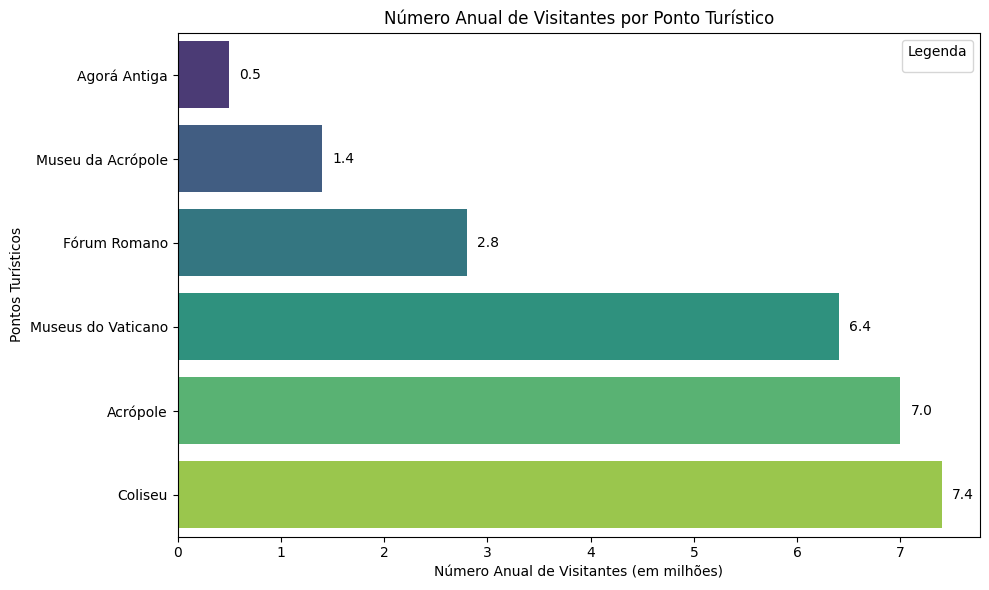

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='visitantes_anuais', y='nome', data=df_final.sort_values('visitantes_anuais'), palette='viridis')

plt.xlabel('Número Anual de Visitantes (em milhões)')
plt.ylabel('Pontos Turísticos')
plt.title('Número Anual de Visitantes por Ponto Turístico')

for index, value in enumerate(df_final.sort_values('visitantes_anuais')['visitantes_anuais']):
    plt.text(
        value +0.1 ,
        index,
        f'{value:.1f}',
        va='center'
    )

plt.legend(title='Legenda')

plt.tight_layout()

plt.show()